In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings

Задание

Цель: изучить применение дерева решений в рамках задачи регрессии

Описание задания:

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.
Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Проведите первичный анализ.
 * a Проверьте данные на пропуски. Удалите в случае обнаружения.
 * b.*Нормализуйте один из признаков.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Обучите модель регрессии на обучающем множестве.

5.  Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6. Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

8. Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.
Результат: получены знания по работе с деревом решений
Форма выполнения:

In [2]:
warnings.filterwarnings('ignore')

# 1.Загрузка данных

In [3]:
raw_data = fetch_california_housing()

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   


* **longitude** - долгота группы
* **latitude** - широта группы
* **HouseAge** - средний возраст дома в группе (median house age in block group)
* **Ave_rooms** - среднее количество комнат (average number of rooms per household)
* **Ave_bedrooms** - среднее количество спален в группе домов (average number of bedrooms per household)
* **population** - количество проживающих в группе домов (block group population)
* **AveOccup** - среднее число участников домохозяйства (average number of household members)
* **MedInc** - средний доход в группе домов (median income in block group)
* **MedHouseVal** - средняя стоимость дома (Median house value for households within a block, measured in US Dollars)

In [4]:
print(raw_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
df = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
print(f'В данных {df.shape[0]} строк и { df.shape[1]} признаков')

В данных 20640 строк и 8 признаков


In [7]:
df['MedHouseVal'] = raw_data.target

# 2.Разведочный анализ - EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### а. Проверкан на пропуски

In [9]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

В сете отсутствуют пропуски. Все признаки числовые и имеют тип данных float

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


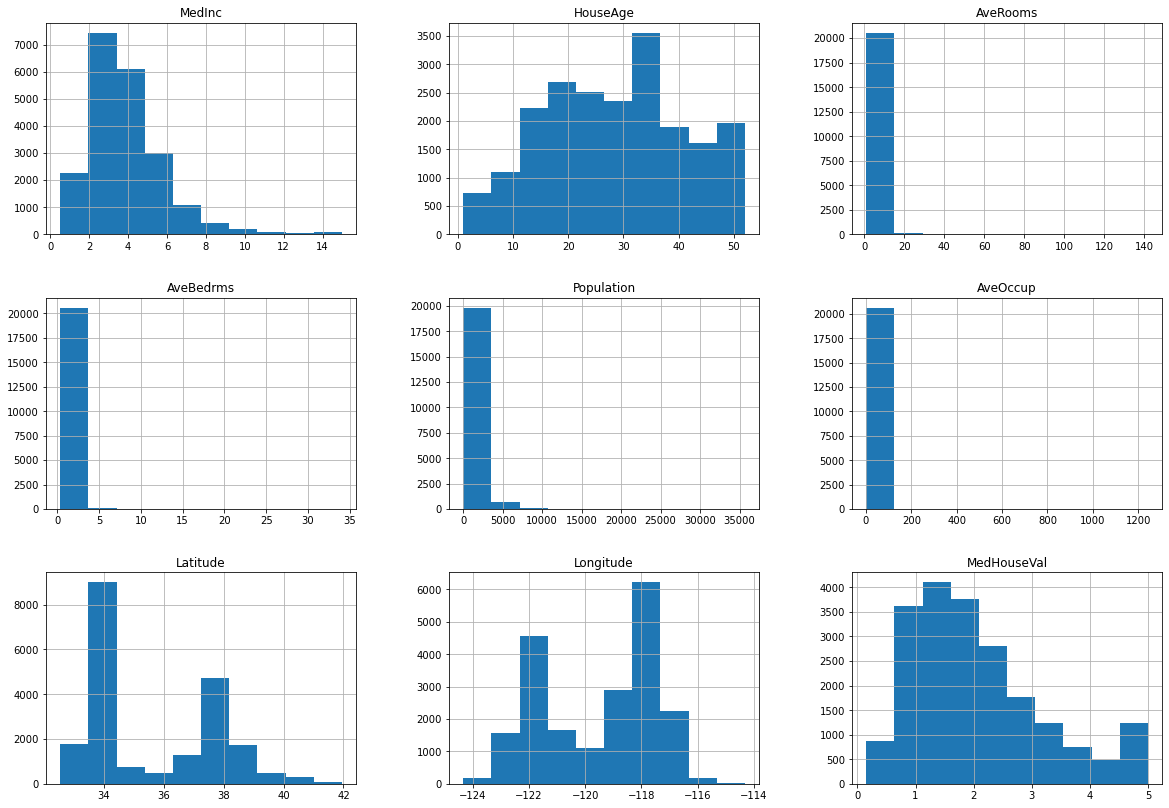

In [11]:
df.hist(figsize=(20,14));

### b. Логорифмирование 

Попробуем перекошенные распределения привести к нормальному виду с помощью логорифирования 

In [12]:
feature_num_names = df.drop('MedHouseVal', axis=1).select_dtypes(include='float64').columns.tolist()
feature_num_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

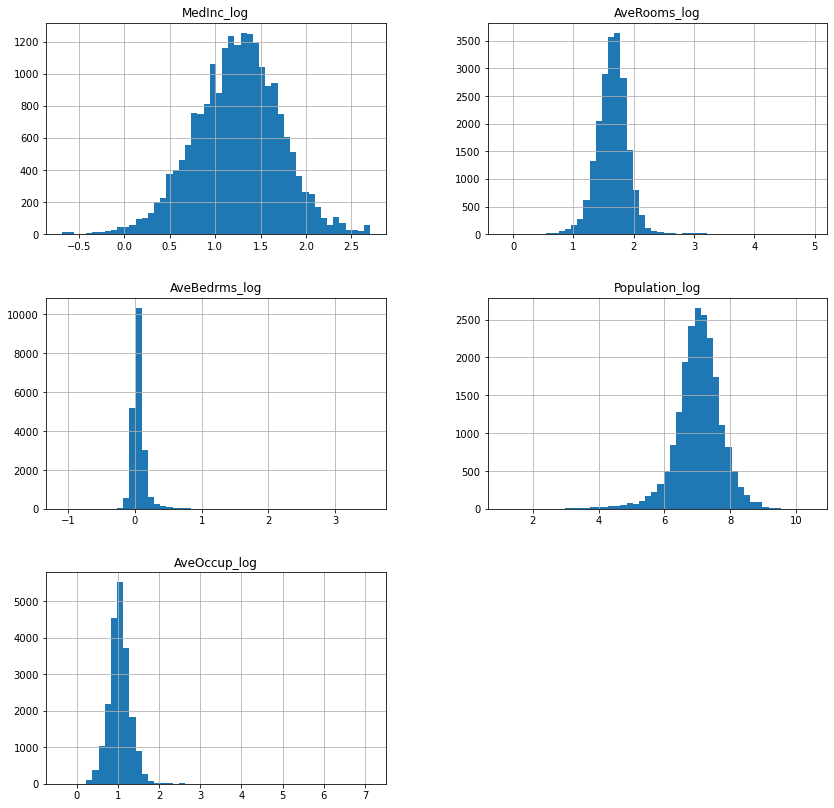

In [13]:
feature_for_log = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup' ]
feature_log_names = []

for f in feature_for_log:
    df[f + '_log'] = np.log(df[f])
    feature_log_names.append(f + '_log')
    
df[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

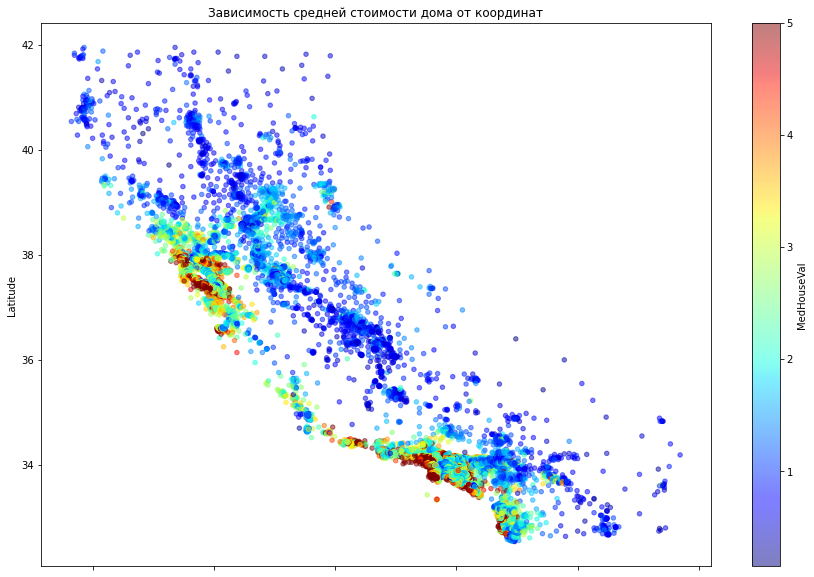

In [14]:
### Расстояние до крупных городов

df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.5, 
        c='MedHouseVal', cmap=plt.get_cmap('jet'), figsize=(15, 10))
plt.title("Зависимость средней стоимости дома от координат");

На карте выделяются две области, где расположены дорогие дома. Эти области расположены вокруг двух крупных городов Калифорнии - Сан-Франциско (37.77493° с.ш., 122.41942° з.д.) и Лос-Анджелес (34.05223° с.ш., 118.24368° з.д.).

Задача на развитие: Можно построить новые признаки - просчитав расстояние до этих крупных городов.

In [15]:
# Убираю оригинальные признаки и оставлю логорифмированные:

selected_col = df.columns.difference(feature_for_log)
selected_col

Index(['AveBedrms_log', 'AveOccup_log', 'AveRooms_log', 'HouseAge', 'Latitude',
       'Longitude', 'MedHouseVal', 'MedInc_log', 'Population_log'],
      dtype='object')

In [16]:
df = df[selected_col]
df.head()

,AveBedrms_log,AveOccup_log,AveRooms_log,HouseAge,Latitude,Longitude,MedHouseVal,MedInc_log,Population_log
0,0.023530,0.938270,1.943640,41.0,37.88,-122.23,4.526,2.119287,5.774552
1,-0.028522,0.746613,1.830682,21.0,37.86,-122.22,3.585,2.116424,7.783641
2,0.070874,1.030426,2.114825,52.0,37.85,-122.24,3.521,1.982022,6.206576
3,0.070514,0.935287,1.760845,52.0,37.85,-122.25,3.413,1.730434,6.324359
4,0.077962,0.779998,1.837665,52.0,37.85,-122.25,3.422,1.347086,6.336826


### c. Проверка корреляции между признаками и таргетом. 

In [17]:
corr = df.corr()
corr

,AveBedrms_log,AveOccup_log,AveRooms_log,HouseAge,Latitude,Longitude,MedHouseVal,MedInc_log,Population_log
AveBedrms_log,1.000000,-0.111797,0.473035,-0.133860,0.087982,0.021664,-0.085838,-0.145024,-0.154848
AveOccup_log,-0.111797,1.000000,-0.009591,-0.011003,-0.134354,0.147889,-0.255862,-0.043125,0.203356
AveRooms_log,0.473035,-0.009591,1.000000,-0.216808,0.145617,-0.066674,0.240386,0.557067,-0.121886
HouseAge,-0.133860,-0.011003,-0.216808,1.000000,0.011173,-0.108197,0.105623,-0.139192,-0.243673
Latitude,0.087982,-0.134354,0.145617,0.011173,1.000000,-0.924664,-0.144160,-0.085359,-0.136241
Longitude,0.021664,0.147889,-0.066674,-0.108197,-0.924664,1.000000,-0.045967,-0.015142,0.108784
MedHouseVal,-0.085838,-0.255862,0.240386,0.105623,-0.144160,-0.045967,1.000000,0.651807,-0.021158
MedInc_log,-0.145024,-0.043125,0.557067,-0.139192,-0.085359,-0.015142,0.651807,1.000000,0.045307
Population_log,-0.154848,0.203356,-0.121886,-0.243673,-0.136241,0.108784,-0.021158,0.045307,1.000000


<AxesSubplot:>

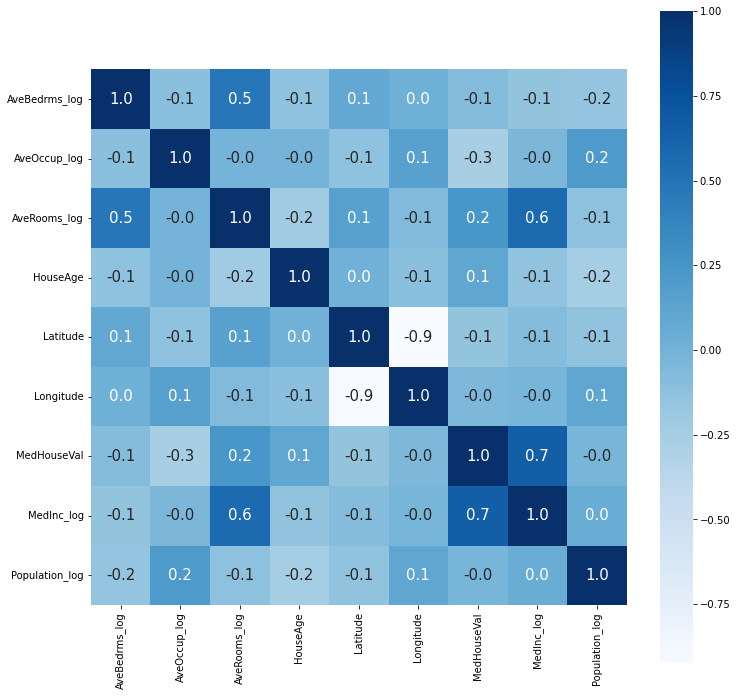

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, square= True, fmt='.1f', annot_kws={'size':15}, annot=True, cmap='Blues')
# sns.color_palette("Blues", as_cmap=True)
# sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

Как видно из тепловой карты, самая сильная по модулю линейная корреляция с MedHouseVal у таких признаков как:

* Medinc_log =      0.7
* AveRooms_log =      0.2
* AveOccup_log =    -0.3

# 3.Разделение выборки на обучающее и тестовое подмножество

In [19]:
# Выделим признаки и целевую метку:
X = df.drop('MedHouseVal', axis = 1) 
y = df['MedHouseVal']

Разделим выборку на обучающее и тестовое подмножества. 80% данных оставим на обучающее множество, 20% - на тестовое.

In [20]:
# Разобьем данные 80 / 20 на тренировочные и тестовые соответственно:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [21]:
print('Train:', X_train.shape[0], '\nTest:', X_test.shape[0])

Train: 16512 
Test: 4128


#  4.Масштабирование признаков
Приведем количественные признаки к единому масштабу с помощью StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5.Линейная регрессия 

In [24]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)


In [25]:
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R^2:', r2_score(y_test, y_test_pred))

MSE: 0.5312662612903244
MAE: 0.5462731181115531
RMSE: 0.7288801419234334
R^2: 0.5925731324394562


Напишем функцию, которая будет строить график рассеяния между реальными значениями и предсказанными

In [26]:
def evaluate_preds(true_values_test, pred_values_test):
    print('Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' +          str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
         
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

Test:	R2 = 0.593	MAE = 0.546


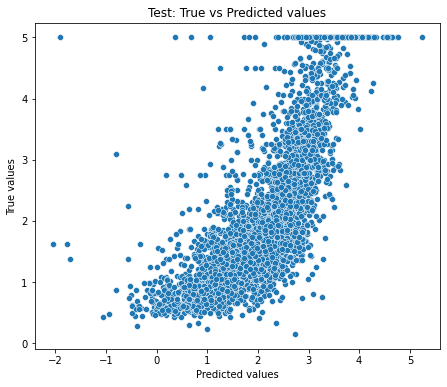

In [27]:
evaluate_preds(y_test, y_test_pred)

In [28]:
scores_model = {}
scores_model['Linear model'] = round(r2_score(y_test, y_test_pred), 4)
scores_model

{'Linear model': 0.5926}

### a. Качество на train-e
Для тестового множества выведим целевую переменную и сравним ее с истинным значением, посчитав точность предсказания модели.

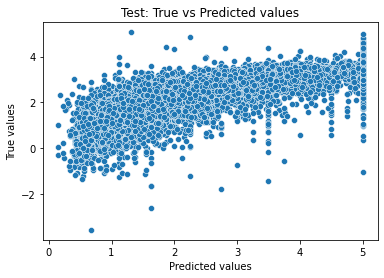

In [29]:
sns.scatterplot(y_train, y_train_pred)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Test: True vs Predicted values');

In [30]:
# Качество на обучающей выборке
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R^2:', r2_score(y_train, y_train_pred))

MSE: 0.5205777094745299
MAE: 0.5458925735194776
RMSE: 0.7215107133470229
R^2: 0.6110364653470258


Качество на обучающей выборке получилось немного получше.

### b. Линейная регрессия с кросс-валидацией

In [31]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

scores = cross_val_score(lr, X, y, cv=cv, scoring='r2', n_jobs=-1)
scores

array([0.60948963, 0.57382729, 0.62124239, 0.60567716, 0.60301287,
       0.603844  , 0.59375466, 0.62030483, 0.58843097, 0.64510477])

In [32]:
r2_score_kfold = round(scores.mean(),4)
print('Средняя оценка R^2 на 10 фолдах для линейной регрессии = ', r2_score_kfold)

Средняя оценка R^2 на 10 фолдах для линейной регрессии =  0.6065


In [33]:
scores_model['Linear model with CV'] = round(r2_score_kfold, 4)

# 6.Дерево решений - Decision Tree

In [34]:
# Запустим алгоритм без настройки параметров, задав только глубину дерева:

dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train) # Деревья не чувствительны к разному масштабу данных, поэтому нет необходимости использовать StandartScaler.

DecisionTreeRegressor(max_depth=5, random_state=42)

Test:	R2 = 0.586	MAE = 0.538


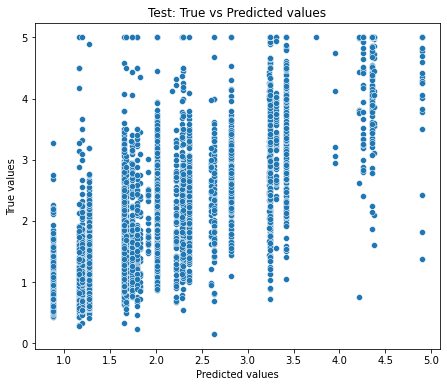

In [35]:
y_train_preds = dt_model.predict(X_train)
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds);

### a. Качество на train-e

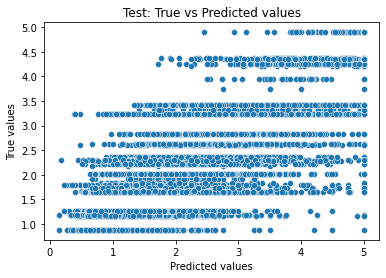

In [36]:
sns.scatterplot(y_train, y_train_preds)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Test: True vs Predicted values');

Видим, по тестовой и обучающей выборке, что дерево не доучилось, недостаточная глубина.

In [37]:
r2_Tree_Decision = r2_score(y_test, y_test_preds)
r2_Tree_Decision 

0.5857247671583736

In [38]:
scores_model['Decision Tree'] = round(r2_Tree_Decision, 4)
scores_model

{'Linear model': 0.5926,
 'Linear model with CV': 0.6065,
 'Decision Tree': 0.5857}

 ###  b. Визуализация дерева решений

In [39]:
from sklearn import tree

In [40]:
feature_names = X_train.columns.to_list()
feature_names

['AveBedrms_log',
 'AveOccup_log',
 'AveRooms_log',
 'HouseAge',
 'Latitude',
 'Longitude',
 'MedInc_log',
 'Population_log']

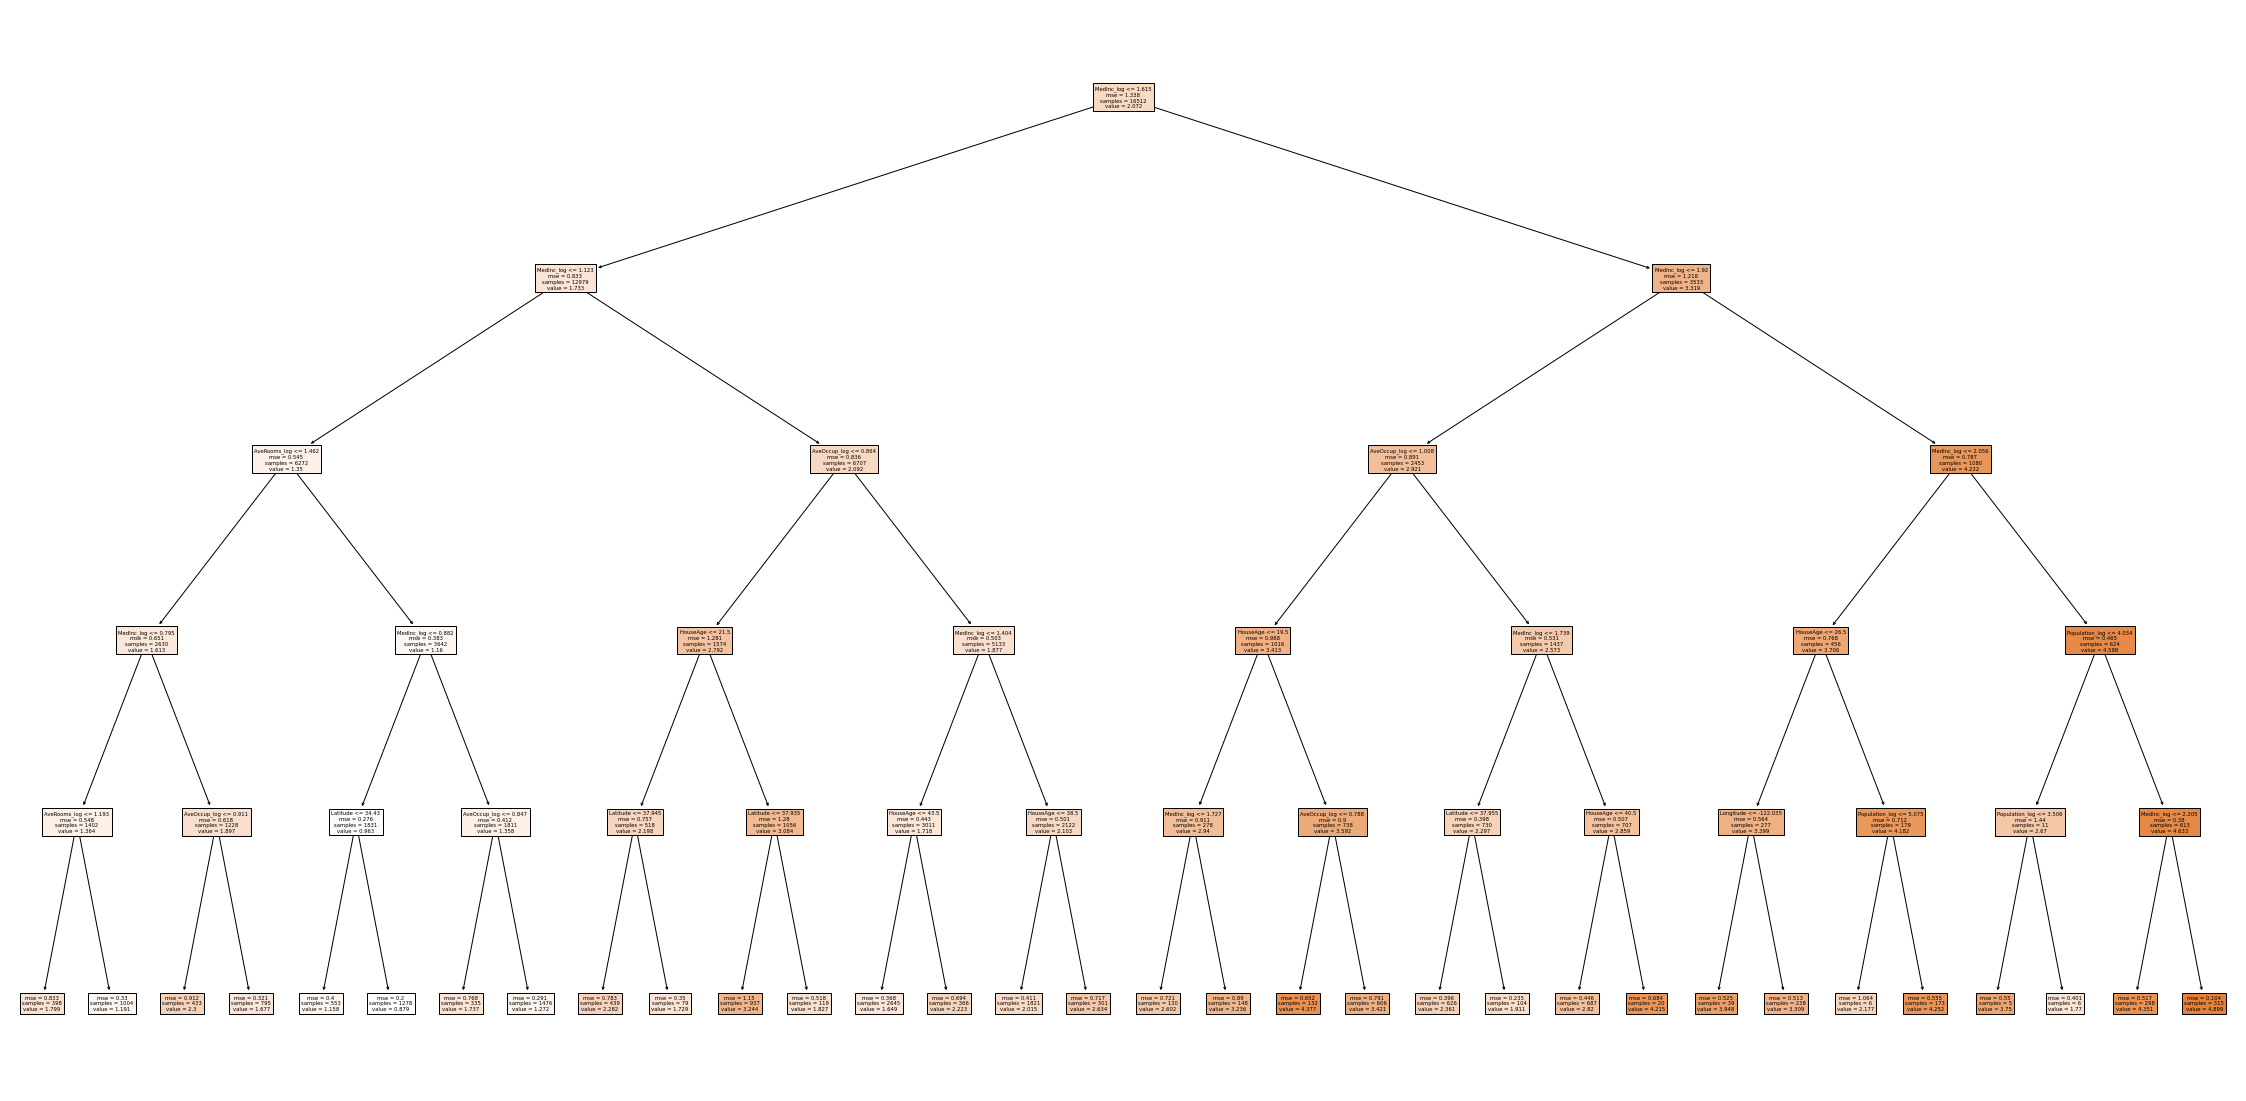

In [41]:
fig = plt.figure(figsize=(40,20))

_ = tree.plot_tree(dt_model, feature_names=feature_names, filled=True);

In [42]:
import graphviz

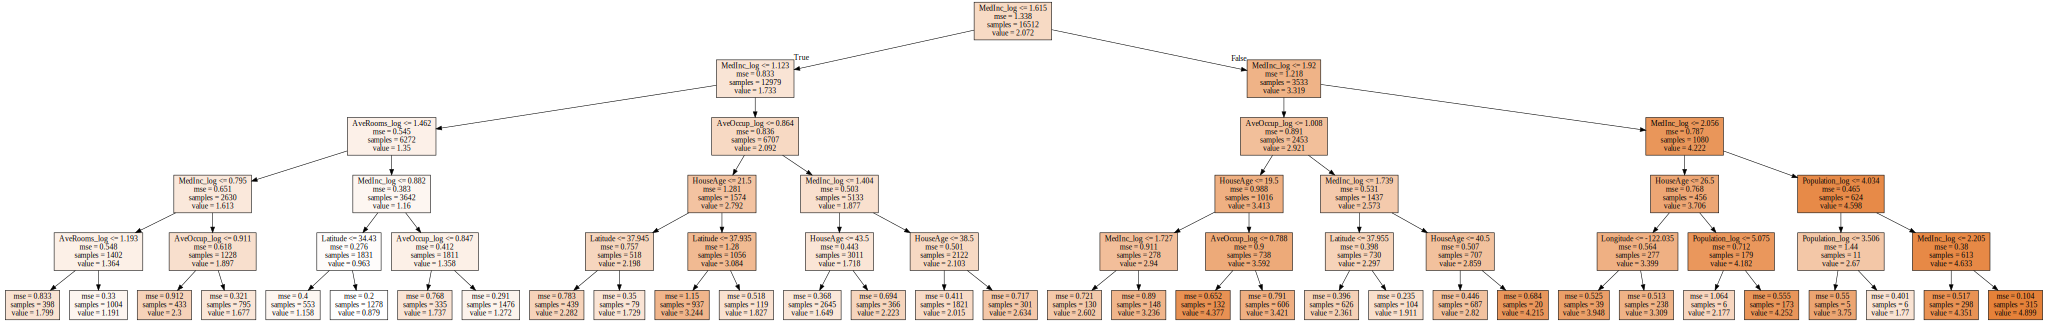

<Figure size 1440x1080 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(20,15))

dot_data = tree.export_graphviz(dt_model, out_file=None, 
                                feature_names=feature_names,  
                                filled=True)

graphviz.Source(dot_data) 

In [ ]:
# Из графика видно, что на тренировочных данных модель переобучилась - запомнила все семплы.

### c. Дерево решений с кросс-валидацией:

In [ ]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

scores = cross_val_score(dt_model, X, y, cv=cv, scoring='r2', n_jobs=-1)
print('R2 для решающего дерева = ', round(scores.mean(), 4))

R2 для решающего дерева =  0.6141


In [ ]:
r2_TD_CV = r2_score(y_test, y_test_preds)
r2_TD_CV

In [ ]:
scores_model['Tree Descion with CV'] = round(r2_TD_CV, 4)
scores_model

{'Linear model': 0.5926,
 'Linear model with CV': 0.6065,
 'Decision Tree': 0.5857,
 'Tree Descion with CV': 0.5857}

# 7.Случайный лес - Random Forest

In [ ]:
# по дефолту без подбора параметров:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Test:	R2 = 0.799	MAE = 0.335


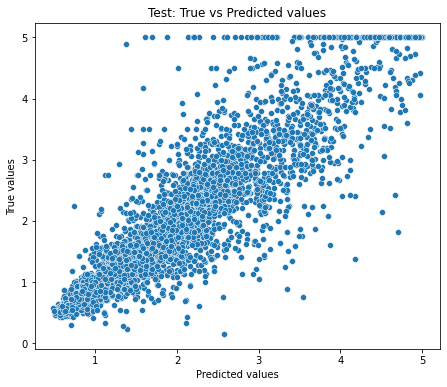

In [ ]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_test, y_test_preds)

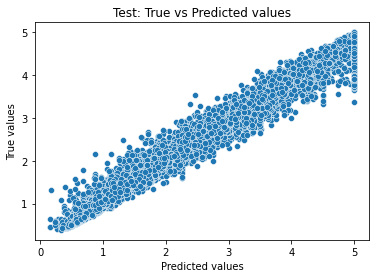

In [ ]:
sns.scatterplot(y_train, y_train_preds)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Test: True vs Predicted values');

In [ ]:
r2_RF = r2_score(y_test, y_test_preds)
r2_RF

0.7989620383257273

In [ ]:
scores_model['Random Forest'] = round(r2_RF, 4)
scores_model

{'Linear model': 0.5926,
 'Linear model with CV': 0.6065,
 'Decision Tree': 0.5857,
 'Tree Descion with CV': 0.5857,
 'Random Forest': 0.799}

### a. Важность признаков

In [ ]:
imp = pd.Series(rf_model.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

<BarContainer object of 8 artists>

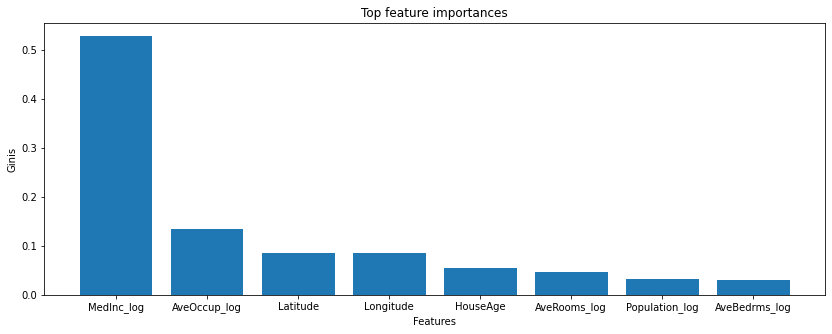

In [ ]:
plt.figure(figsize=(14,5))
plt.title('Top feature importances')
plt.xlabel('Features')
plt.ylabel('Ginis')

plt.bar(imp.sort_values(ascending=False).index, imp.sort_values(ascending=False))

# 8.Gradient Boosting - Градиентный бустинг из Sklearn

In [ ]:
# Из Sklearn:

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

Test:	R2 = 0.777	MAE = 0.374


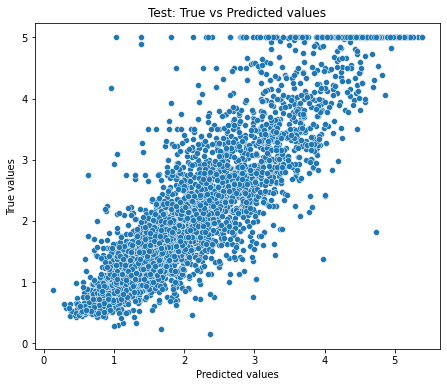

In [ ]:
evaluate_preds(y_test, y_test_preds)

In [ ]:
r2_GB_sklearn = r2_score( y_test, y_test_preds)

In [ ]:
scores_model['GB from Sklearn lib'] = round(r2_GB_sklearn, 4)
scores_model

{'Linear model': 0.5926,
 'Linear model with CV': 0.6065,
 'Decision Tree': 0.5857,
 'Tree Descion with CV': 0.5857,
 'Random Forest': 0.799,
 'GB from Sklearn lib': 0.7772}

# 9.Gradient Boosting - Градиентный бустинг из lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()

lgbm.fit(X_train, y_train)

y_train_preds = lgbm.predict(X_train)
y_test_preds = lgbm.predict(X_test)


In [ ]:
r2_GB_lightgbm = r2_score( y_test, y_test_preds)
r2_GB_lightgbm

0.8430336990629582

In [ ]:
scores_model['GB from lightgbm lib'] = round(r2_GB_sklearn, 4)

In [ ]:
r2_GB_sklearn = r2_score( y_test, y_test_preds)

Test:	R2 = 0.843	MAE = 0.306


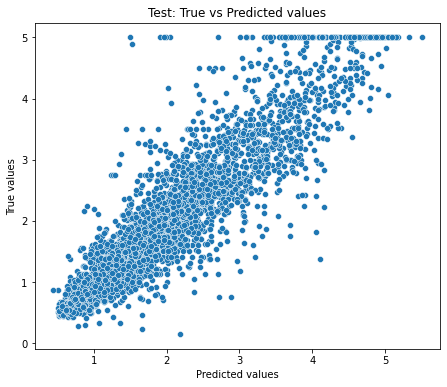

In [ ]:
evaluate_preds(y_test, y_test_preds)

### a. Настройка и оценка финальной модели lightgbm

In [ ]:
cv = 5

param_grid = { 
              'n_estimators': [100, 200], 
              'max_depth': [6, 10, 15],
              'num_leaves': [20, 30, 40, 50]
             }

lgbm_model_cv = GridSearchCV(LGBMRegressor(), 
                           param_grid,  
                           cv=cv,
                           scoring='r2', 
                           n_jobs=-1).fit(X_train, y_train)


In [ ]:
y_train_preds = lgbm_model_cv.predict(X_train)
y_test_preds = lgbm_model_cv.predict(X_test)

In [ ]:
r2_GB_lightgbm_CV = round(r2_score( y_test, y_test_preds), 4)
r2_GB_lightgbm_CV

0.852

In [ ]:
scores_model['GB from Lightgbm with CV'] = r2_GB_lightgbm_CV

Test:	R2 = 0.852	MAE = 0.292


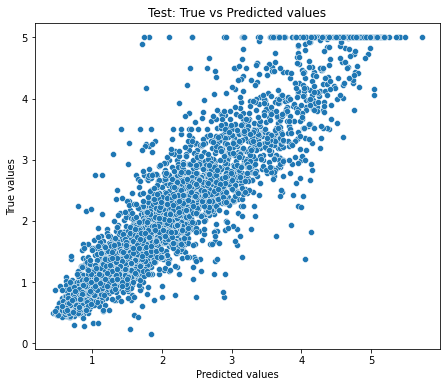

In [ ]:
evaluate_preds(y_test, y_test_preds)

# 10.Нейронная сеть прямого распространения FFN

In [ ]:
import tensorflow.keras as tf 

In [ ]:
n_features = X.shape[1]
n_features

8

In [ ]:
def build_and_compile_model():
    model = tf.Sequential([
        tf.layers.Dense(256, activation='relu',  input_shape=(n_features, )),
        tf.layers.Dropout(0.3), # выключаю часть нейронов для борьбы с переобучением
        tf.layers.Dense(256, activation='relu'),
        tf.layers.Dropout(0.3),
        tf.layers.Dense(64, activation='relu'),
        tf.layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.optimizers.Adam(0.0007))
    return model

In [ ]:
model = build_and_compile_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2304      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 84,609
Trainable params: 84,609
Non-trai

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50)

Epoch 1/25
413/413 [==============================] - 4s 6ms/step - loss: 0.5377 - val_loss: 0.4103
Epoch 2/25
413/413 [==============================] - 3s 6ms/step - loss: 0.4530 - val_loss: 0.4103
Epoch 3/25
413/413 [==============================] - 2s 5ms/step - loss: 0.4362 - val_loss: 0.3963
Epoch 4/25
413/413 [==============================] - 2s 5ms/step - loss: 0.4213 - val_loss: 0.3868
Epoch 5/25
413/413 [==============================] - 2s 5ms/step - loss: 0.4153 - val_loss: 0.3809
Epoch 6/25
413/413 [==============================] - 2s 5ms/step - loss: 0.4062 - val_loss: 0.3734
Epoch 7/25
413/413 [==============================] - 2s 5ms/step - loss: 0.4009 - val_loss: 0.3700
Epoch 8/25
413/413 [==============================] - 2s 5ms/step - loss: 0.3941 - val_loss: 0.3972
Epoch 9/25
413/413 [==============================] - 2s 6ms/step - loss: 0.3902 - val_loss: 0.3715
Epoch 10/25
413/413 [==============================] - 2s 5ms/step - loss: 0.3845 - val_loss: 0.3564

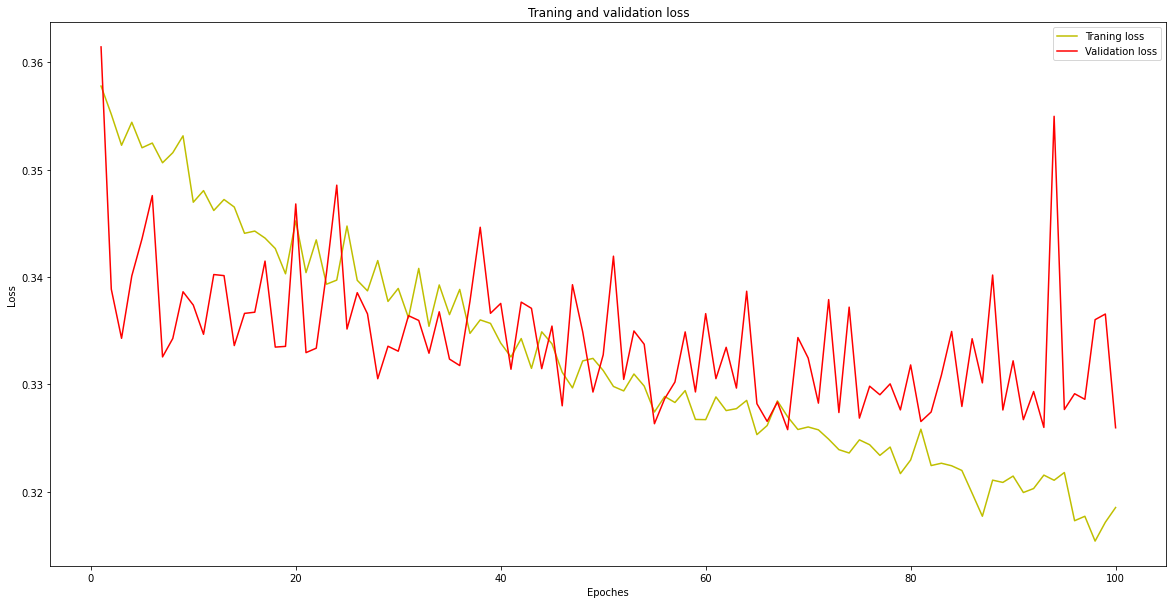

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 10))
epoches = range(1, len(loss) + 1)
plt.plot(epoches, loss, 'y', label='Traning loss')
plt.plot(epoches, val_loss, 'r', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

Из графика видно, что модель после 70 эпохи начинает переобучаться и качество на валидации падает. С точки зрения качества и производительности оптимальный вариант выйти c 50 до 70 эпохи обучения. Альтернативный вариант закончить обучение на 25 эпохе обучения, т.к. далее ошибка падает незначительно.

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=65)

Epoch 1/65
413/413 [==============================] - 7s 7ms/step - loss: 0.5470 - val_loss: 0.4529
Epoch 2/65
413/413 [==============================] - 2s 6ms/step - loss: 0.4563 - val_loss: 0.4117
Epoch 3/65
413/413 [==============================] - 2s 6ms/step - loss: 0.4371 - val_loss: 0.3904
Epoch 4/65
413/413 [==============================] - 3s 8ms/step - loss: 0.4269 - val_loss: 0.3945
Epoch 5/65
413/413 [==============================] - 3s 8ms/step - loss: 0.4155 - val_loss: 0.3951
Epoch 6/65
413/413 [==============================] - 3s 8ms/step - loss: 0.4069 - val_loss: 0.4049
Epoch 7/65
413/413 [==============================] - 2s 6ms/step - loss: 0.3994 - val_loss: 0.3893
Epoch 8/65
413/413 [==============================] - 2s 5ms/step - loss: 0.3947 - val_loss: 0.3665
Epoch 9/65
413/413 [==============================] - 3s 6ms/step - loss: 0.3897 - val_loss: 0.3619
Epoch 10/65
413/413 [==============================] - 3s 6ms/step - loss: 0.3833 - val_loss: 0.3583

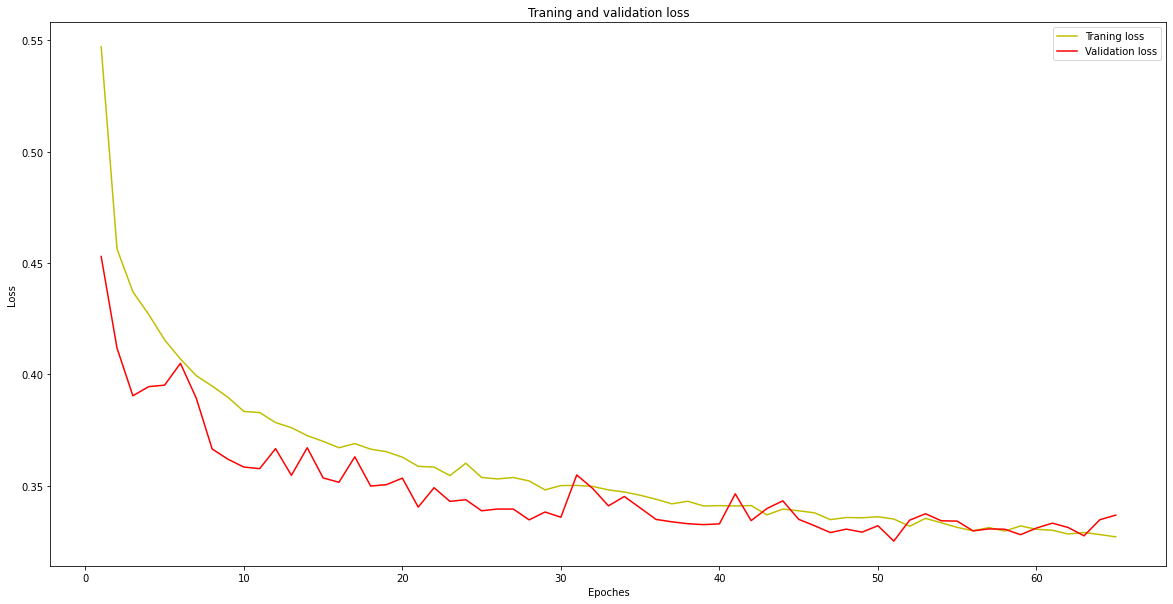

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 10))
epoches = range(1, len(loss) + 1)
plt.plot(epoches, loss, 'y', label='Traning loss')
plt.plot(epoches, val_loss, 'r', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_neural_pred = model.predict(X_test_scaled)

129/129 [==============================] - 0s 2ms/step


In [ ]:
mse_nueral = model.evaluate(X_test_scaled, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3375


In [ ]:
mse_nueral

0.3374813497066498

In [ ]:
r2_score_neural = r2_score(y_test, y_neural_pred)

In [ ]:
scores_model['Feed Forward Nerual Network FFN'] = round(r2_score_neural, 4)
scores_model

{'Linear model': 0.5926,
 'Linear model with CV': 0.6065,
 'Decision Tree': 0.5857,
 'Tree Descion with CV': 0.5857,
 'Random Forest': 0.799,
 'GB from Sklearn lib': 0.7772,
 'GB from lightgbm lib': 0.843,
 'GB from Lightgbm with CV': 0.852,
 'Feed Forward Nerual Network FFN': 0.7944}

# 11.Заключение и выводы

In [ ]:
scores_model_df = pd.DataFrame(scores_model.items(), columns=['Model', 'R2_score']).sort_values('R2_score', ascending=False)
scores_model_df

,Model,R2_score
7,GB from Lightgbm with CV,0.8520
6,GB from lightgbm lib,0.8430
4,Random Forest,0.7990
8,Feed Forward Nerual Network FFN,0.7944
5,GB from Sklearn lib,0.7772
1,Linear model with CV,0.6065
0,Linear model,0.5926
2,Decision Tree,0.5857
3,Tree Descion with CV,0.5857


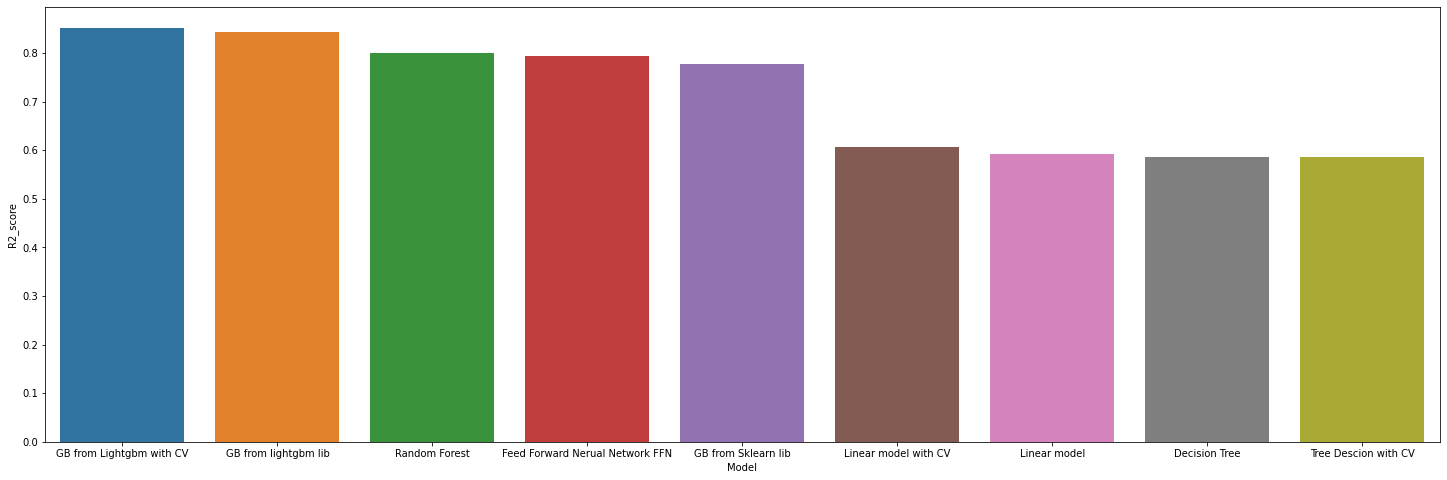

In [ ]:
plt.figure(figsize=(25, 8))
sns.barplot(data=scores_model_df, x='Model', y='R2_score');

Зафиксируем Топ 3 лучших алгоритма:

* C хорошим отрывом победил алгоритм градиентного бустинга на базе библиотеки lightgbm. В реализации использовалась кросс-валидация и подбор гиперпараметров по сетке с GridSearch-ем. 
* Random Forest - устойчивый алгоритм, работает стабильно даже с дефолтными настройками и дает высокое качество. Преимущество Random Forest-a еще в том, что он дополнительно с помощью метода feature_importances_ показывает важность признаков, влияющих на наш целевую метку (таргет).
* Нейроная сеть прямого распространения FFN, построенная с помощью библиотеки Google tanserflow, показала высокую метрику качества и практически не уступает Random Forest-у.

Отдельно хотел бы отметить:

* Одинокие Деревья Decision Tree очень быстро переобучаются. По дефолту, если не ограничивать глубину, то мы сразу же переобучаемся на трейне и получаем плохое качество на отложенной тренировочной выборке. Качество Decision Tree значительно уступает композициям деревьев.

* Линейная модель получилась хорошим base line алгоритмом, но при этом она не смогла найти более сложную нелинейную закономерность в данных и показала  низкое качество.